## Data Prep

In [ ]:
import pandas as pd

In [ ]:
data2 = pd.read_csv('PC_data.csv', index_col=0)
data2

,First,Second,Third,Fourth,Fifth,gross_income
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,105943
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,101740
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,96130
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,92189
4,-5.451181,0.097442,0.699995,0.421614,0.575257,91199
...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,17232
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,17144
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,16667
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,15687


In [ ]:
X = data2.iloc[:, :5]
y = data2.iloc[:, -1]

In [ ]:
X

,First,Second,Third,Fourth,Fifth
0,14.716475,6.337840,0.233860,-5.483357,-2.700865
1,-0.189993,1.937290,0.909716,-3.196348,0.501330
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146
4,-5.451181,0.097442,0.699995,0.421614,0.575257
...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979


In [ ]:
y

0       105943
1       101740
2        96130
3        92189
4        91199
         ...  
3404     17232
3405     17144
3406     16667
3407     15687
3408     14901
Name: gross_income, Length: 3409, dtype: int64

##K-means Clustering

In [ ]:
#Initialize our model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)


In [ ]:
#Fit our model
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
k_mean_clusters = kmeans.predict(X)

In [ ]:
#Add the cluster vector to our DataFrame, X
X["Kmeans_c"] = k_mean_clusters
X

,First,Second,Third,Fourth,Fifth,Kmeans_c
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,0
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,1
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,1
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,1
4,-5.451181,0.097442,0.699995,0.421614,0.575257,1
...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,1
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,1
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,1
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,1


In [ ]:
kmeanscs = X["Kmeans_c"]

In [ ]:
kmeanscs 

0       0
1       1
2       1
3       1
4       1
       ..
3404    1
3405    1
3406    1
3407    1
3408    1
Name: Kmeans_c, Length: 3409, dtype: int32

In [ ]:
income = data2[['gross_income']]
income

,gross_income
0,105943
1,101740
2,96130
3,92189
4,91199
...,...
3404,17232
3405,17144
3406,16667
3407,15687


In [ ]:
X = pd.concat([X, income], axis='columns')
X

,First,Second,Third,Fourth,Fifth,Kmeans_c,gross_income
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,0,105943
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,1,101740
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,1,96130
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,1,92189
4,-5.451181,0.097442,0.699995,0.421614,0.575257,1,91199
...,...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,1,17232
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,1,17144
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,1,16667
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,1,15687


In [ ]:
X.groupby('Kmeans_c').mean()

,First,Second,Third,Fourth,Fifth,gross_income
Kmeans_c,,,,,,
0,13.934672,1.963813,-1.441437,-1.106131,0.128717,53833.085011
1,-3.530084,-0.254679,0.186407,0.149253,-0.015489,42845.876939
2,65.770082,-2.278704,1.697650,1.007508,-0.206582,53504.540984


### viz

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Second', z='Third', color='Kmeans_c')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Fifth', z='Third', color='Kmeans_c')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='Fourth', y='Fifth', z='Third', color='Kmeans_c')
fig.show()

## MeanShift clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
ms = MeanShift()
ms.fit(X) 

MeanShift()

In [ ]:
mean_shift_clusters = ms.predict(X)
mean_shift_clusters

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#Add the cluster vector to our DataFrame, X
X["MS_c"] = mean_shift_clusters
X

,First,Second,Third,Fourth,Fifth,Kmeans_c,gross_income,MS_c
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,0,105943,1
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,1,101740,1
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,1,96130,1
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,1,92189,1
4,-5.451181,0.097442,0.699995,0.421614,0.575257,1,91199,1
...,...,...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,1,17232,0
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,1,17144,0
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,1,16667,0
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,1,15687,0


In [ ]:
X["MS_c_str"] = X['MS_c'].astype(str)
X

,First,Second,Third,Fourth,Fifth,Kmeans_c,gross_income,MS_c,MS_c_str
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,0,105943,1,1
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,1,101740,1,1
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,1,96130,1,1
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,1,92189,1,1
4,-5.451181,0.097442,0.699995,0.421614,0.575257,1,91199,1,1
...,...,...,...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,1,17232,0,0
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,1,17144,0,0
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,1,16667,0,0
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,1,15687,0,0


In [ ]:
print(X['MS_c'].unique())

[1 0]


In [ ]:
X.groupby('MS_c').mean()

<ipython-input-111-83534a71eba6>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,First,Second,Third,Fourth,Fifth,Kmeans_c,gross_income
MS_c,,,,,,,
0,-0.021590,-0.027021,-0.000108,0.003236,0.000221,0.887792,43762.356373
1,1.076909,1.347819,0.005381,-0.161399,-0.011029,0.835821,80138.208955


In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Second', z='Fourth', color='MS_c_str')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='Fourth', y='Fifth', z='Third', color='MS_c_str')
fig.show()

## Hierarchical Clustering Algorithm

In [ ]:
from sklearn.mixture import GaussianMixture

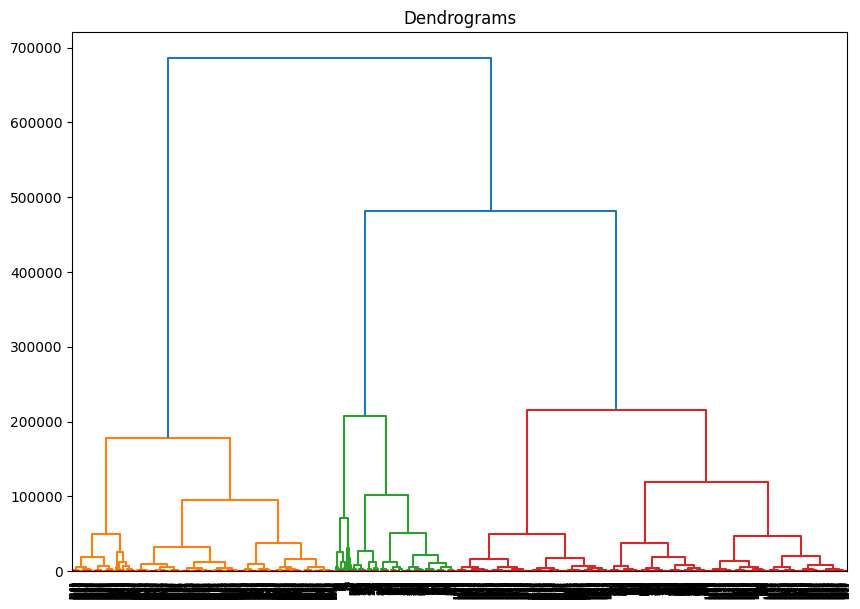

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=520, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
clusters

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
hierarch_clusters = clusters

In [ ]:
#Add the cluster vector to our DataFrame, X
X["Hierarch"] = hierarch_clusters
X

,First,Second,Third,Fourth,Fifth,Kmeans_c,gross_income,MS_c,MS_c_str,Hierarch
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,0,105943,1,1,2
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,1,101740,1,1,2
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,1,96130,1,1,2
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,1,92189,1,1,2
4,-5.451181,0.097442,0.699995,0.421614,0.575257,1,91199,1,1,2
...,...,...,...,...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,1,17232,0,0,1
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,1,17144,0,0,1
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,1,16667,0,0,1
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,1,15687,0,0,1


In [ ]:
X["Hier_c"] = X['Hierarch'].astype(str)
X

,First,Second,Third,Fourth,Fifth,Kmeans_c,gross_income,MS_c,MS_c_str,Hierarch,Hier_c
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,0,105943,1,1,2,2
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,1,101740,1,1,2,2
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,1,96130,1,1,2,2
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,1,92189,1,1,2,2
4,-5.451181,0.097442,0.699995,0.421614,0.575257,1,91199,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,1,17232,0,0,1,1
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,1,17144,0,0,1,1
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,1,16667,0,0,1,1
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,1,15687,0,0,1,1


In [ ]:
hier_cs = X['Hier_c']
hier_cs

0       2
1       2
2       2
3       2
4       2
       ..
3404    1
3405    1
3406    1
3407    1
3408    1
Name: Hier_c, Length: 3409, dtype: object

In [ ]:
X = X.drop('MS_c', axis=1)
X = X.drop('Hierarch', axis=1)
X = X.drop('MS_c_str', axis=1)
X = X.drop('Kmeans_c', axis=1)
X

,First,Second,Third,Fourth,Fifth,gross_income,Hier_c
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,105943,2
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,101740,2
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,96130,2
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,92189,2
4,-5.451181,0.097442,0.699995,0.421614,0.575257,91199,2
...,...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,17232,1
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,17144,1
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,16667,1
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,15687,1


In [ ]:
X.groupby('Hier_c').mean()

,First,Second,Third,Fourth,Fifth,gross_income
Hier_c,,,,,,
0,-1.007459,-0.328338,0.052019,0.068639,0.111069,46457.423010
1,-2.645391,-0.456895,0.445146,-0.313349,-0.441432,32898.069025
2,9.073432,2.069206,-1.144516,0.463221,0.605804,63404.476371


In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Second', z='Third', color='Hier_c')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='First', y='Fifth', z='Third', color='Hier_c')
fig.show()

 ## Mergin


In [ ]:
X

,First,Second,Third,Fourth,Fifth,gross_income,Hier_c
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,105943,2
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,101740,2
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,96130,2
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,92189,2
4,-5.451181,0.097442,0.699995,0.421614,0.575257,91199,2
...,...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,17232,1
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,17144,1
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,16667,1
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,15687,1


In [ ]:
X.insert(6,'Kmeans', k_mean_clusters)

In [ ]:
X.insert(7, 'Mean Shift', mean_shift_clusters)

In [ ]:
X

,First,Second,Third,Fourth,Fifth,gross_income,Kmeans,Mean Shift,Hier_c
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,105943,0,1,2
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,101740,1,1,2
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,96130,1,1,2
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146,92189,1,1,2
4,-5.451181,0.097442,0.699995,0.421614,0.575257,91199,1,1,2
...,...,...,...,...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583,17232,1,0,1
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538,17144,1,0,1
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892,16667,1,0,1
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979,15687,1,0,1


In [ ]:
X.to_csv('Clustered_data.csv')